# COMP4121 Project - How do I influence people on online social network?
###### created by yisong jiang(z5123920)

## What's in this notebook? How to read it?
All the implementing, examples, testings of this project.
<br>The cells with in[] are python code cells that can be run and running result will be below of them

## Measuring node importance
We now use the example network in the textbook to calculate the 4 approaches to measure node importance
![](src/1.png)

In [1]:
#import the modules that we will use in this project
import numpy as np
import copy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
import networkx as nx
import operator
warnings.filterwarnings("ignore")

## build my own graph and define implement functions 

In [2]:
# simply bidirected node
class node():
    def __init__(self,value,name):
        self.value = value
        self.connected_nodes = []
        self.name = name
# general setup
# add nodes into the graph as well as their neighbours
node1 = node(1,'N1')
node2 = node(2,'N2')
node3 = node(3,'N3')
node4 = node(4,'N4')
node5 = node(5,'N5')
node6 = node(6,'N6')
node7 = node(7,'N7')
node8 = node(8,'N8')
node1.connected_nodes.extend([node2,node3,node4])
node2.connected_nodes.extend([node1,node4,node5])
node3.connected_nodes.extend([node1,node6,node7,node8])
node4.connected_nodes.extend([node1,node2,node5])
node5.connected_nodes.extend([node2,node4])
node6.connected_nodes.extend([node7,node3])
node7.connected_nodes.extend([node6,node3,node8])
node8.connected_nodes.extend([node7,node3])

nodelist = [node1,node2,node3,node4,node5,node6,node7,node8]
num_node = len(nodelist)


In [3]:
# adjacency matrix

adjacency = []
for nd in nodelist:
    adj_vector = []
    for ond in nodelist:
        if (ond in nd.connected_nodes):
            adj_vector.append(1)
        else:
            adj_vector.append(0)
    adjacency.append(adj_vector)
adjacency = np.matrix(adjacency)
print("Adjacency matrix:")
adjacency

Adjacency matrix:


matrix([[0, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 1],
        [1, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0, 1, 0]])

Eigenvector centrality
![](src/2.png)

In [4]:
#Eigenvector centrality
w,v =np.linalg.eig(adjacency)
print("Largest eigenvalue:",w[0])
print("Eigenvector centrality for nodes:\n",v.T[0][0])

Largest eigenvalue: 2.87227621285
Eigenvector centrality for nodes:
 [[ 0.40631618  0.34551743  0.47601744  0.34551743  0.24058789  0.29492475
   0.37108789  0.29492475]]


In [5]:
def shortest_path(start,end):
    if start == end:
        return 0,'X','X'
    path = [[start]]
    while(True):
        allnode = []
        for subpath in path:
            allnode.extend(subpath)
        if end in allnode:
            break
        newpath = []
        for subpath in path:
            lastnode = subpath[-1]
            for node in lastnode.connected_nodes:
                if not node in subpath:
                    newpath.append(subpath+[node])
        path = newpath
    path_with_name = []
    for subpath in path:
        if not end in subpath:
            continue
        sub = []
        for s in subpath:
            sub.append(s.name)
        path_with_name.append(sub)
    num_of_shortest_path = len(path_with_name)
    length_of_shortest_path = len(path_with_name[0])-1
    return length_of_shortest_path,num_of_shortest_path,path_with_name

print("Length of shortest path between two nodes:")
for i in range(num_node):
    for j in range(num_node):
        if not i == j:
            length,_,_ = shortest_path(nodelist[i],nodelist[j])
            print("D"+str(i+1)+str(j+1)+":",length,end = ' ')
    print()
            

Length of shortest path between two nodes:
D12: 1 D13: 1 D14: 1 D15: 2 D16: 2 D17: 2 D18: 2 
D21: 1 D23: 2 D24: 1 D25: 1 D26: 3 D27: 3 D28: 3 
D31: 1 D32: 2 D34: 2 D35: 3 D36: 1 D37: 1 D38: 1 
D41: 1 D42: 1 D43: 2 D45: 1 D46: 3 D47: 3 D48: 3 
D51: 2 D52: 1 D53: 3 D54: 1 D56: 4 D57: 4 D58: 4 
D61: 2 D62: 3 D63: 1 D64: 3 D65: 4 D67: 1 D68: 2 
D71: 2 D72: 3 D73: 1 D74: 3 D75: 4 D76: 1 D78: 1 
D81: 2 D82: 3 D83: 1 D84: 3 D85: 4 D86: 2 D87: 1 


![](src/3.png)

In [6]:
closeness_centrality = []
G = []
for node in nodelist:
    num_other_node = num_node-1
    len_sum = 0
    tmp = []
    for other_node in nodelist:
        length,num,_ = shortest_path(node,other_node)
        len_sum = len_sum + length
        tmp.append(num)
    G.append(tmp)
    closeness_centrality.append(num_other_node/len_sum)
print("closeness_centrality for nodes:")
print(closeness_centrality)
print("matrix G for nodes:")
G = np.matrix(G)
print(G)

closeness_centrality for nodes:
[0.6363636363636364, 0.5, 0.6363636363636364, 0.5, 0.3684210526315789, 0.4375, 0.4666666666666667, 0.4375]
matrix G for nodes:
[['X' '1' '1' '1' '2' '1' '1' '1']
 ['1' 'X' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'X' '1' '2' '1' '1' '1']
 ['1' '1' '1' 'X' '1' '1' '1' '1']
 ['2' '1' '2' '1' 'X' '2' '2' '2']
 ['1' '1' '1' '1' '2' 'X' '1' '2']
 ['1' '1' '1' '1' '2' '1' 'X' '1']
 ['1' '1' '1' '1' '2' '2' '1' 'X']]


In [7]:
def num_in_path(target):
    N = []
    for node in nodelist:
        length = len(nodelist)
        if node == target:
            N.append(length*['X'])
            continue
        tmp = []
        for othernode in nodelist:
            if othernode == target or othernode == node:
                tmp.append('X')
                continue
            count = 0
            _,_,paths = shortest_path(node,othernode)
            for subpath in paths:
                if target.name in subpath:
                    count = count+1
            tmp.append(count)
        N.append(tmp)
    N = np.matrix(N)
    return N
print('N1:\n',num_in_path(node1))
print('N2:\n',num_in_path(node2))

N1:
 [['X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['X' 'X' '1' '0' '0' '1' '1' '1']
 ['X' '1' 'X' '1' '2' '0' '0' '0']
 ['X' '0' '1' 'X' '0' '1' '1' '1']
 ['X' '0' '2' '0' 'X' '2' '2' '2']
 ['X' '1' '0' '1' '2' 'X' '0' '0']
 ['X' '1' '0' '1' '2' '0' 'X' '0']
 ['X' '1' '0' '1' '2' '0' '0' 'X']]
N2:
 [['X' 'X' '0' '0' '1' '0' '0' '0']
 ['X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['0' 'X' 'X' '0' '1' '0' '0' '0']
 ['0' 'X' '0' 'X' '0' '0' '0' '0']
 ['1' 'X' '1' '0' 'X' '1' '1' '1']
 ['0' 'X' '0' '0' '1' 'X' '0' '0']
 ['0' 'X' '0' '0' '1' '0' 'X' '0']
 ['0' 'X' '0' '0' '1' '0' '0' 'X']]


![](src/4.png)

In [8]:
def betweenness_centrality(n):
    N = num_in_path(n)
    indx = nodelist.index(n)
    ss = 0
    for i in range(num_node):
        for j in range(i+1,num_node):
            if (not i == indx) and (not j == indx):
                ss = ss + (float(N[i,j])/float(G[i,j]))
    return ss

print('B1:{:.2f}'.format(betweenness_centrality(node1)))
print('B2:{:.2f}'.format(betweenness_centrality(node2)))

B1:12.00
B2:2.50


### Measuring link importance

In [9]:
def num_link_in_path(v1,v2):
    N = []
    for node in nodelist:
        tmp = []
        for othernode in nodelist:
            if othernode == node:
                tmp.append('X')
                continue
            count = 0
            _,_,paths = shortest_path(node,othernode)
            for subpath in paths:
                if v1.name in subpath and v2.name in subpath:
                    ind1 = subpath.index(v1.name)
                    ind2 = subpath.index(v2.name)
                    if abs(ind1-ind2)==1:
                        count = count +1
                    
            tmp.append(count)
        N.append(tmp)
    N = np.matrix(N)
    return N
print("N({},{}):".format(node1.name,node3.name))
print(num_link_in_path(node1,node3))
print("N({},{}):".format(node1.name,node2.name))
print(num_link_in_path(node1,node2))

N(N1,N3):
[['X' '0' '1' '0' '0' '1' '1' '1']
 ['0' 'X' '1' '0' '0' '1' '1' '1']
 ['1' '1' 'X' '1' '2' '0' '0' '0']
 ['0' '0' '1' 'X' '0' '1' '1' '1']
 ['0' '0' '2' '0' 'X' '2' '2' '2']
 ['1' '1' '0' '1' '2' 'X' '0' '0']
 ['1' '1' '0' '1' '2' '0' 'X' '0']
 ['1' '1' '0' '1' '2' '0' '0' 'X']]
N(N1,N2):
[['X' '1' '0' '0' '1' '0' '0' '0']
 ['1' 'X' '1' '0' '0' '1' '1' '1']
 ['0' '1' 'X' '0' '1' '0' '0' '0']
 ['0' '0' '0' 'X' '0' '0' '0' '0']
 ['1' '0' '1' '0' 'X' '1' '1' '1']
 ['0' '1' '0' '0' '1' 'X' '0' '0']
 ['0' '1' '0' '0' '1' '0' 'X' '0']
 ['0' '1' '0' '0' '1' '0' '0' 'X']]


![](src/5.png)

In [10]:
def betweenness_centrality_link(v1,v2):
    N = num_link_in_path(v1,v2)
    ss = 0
    for i in range(num_node):
        for j in range(i+1,num_node):
            ss = ss + (float(N[i,j])/float(G[i,j]))
    return ss
print("Summary:")
print("D1:",len(node1.connected_nodes))
print("D2:",len(node2.connected_nodes))
print("E1:{:.2f}".format(v[0][0,0]))
print("E2:{:.2f}".format(v[1][0,0]))
print("C1:{:.2f}".format(closeness_centrality[0]))
print("C2:{:.2f}".format(closeness_centrality[1]))
print('B1:{:.2f}'.format(betweenness_centrality(node1)))
print('B2:{:.2f}'.format(betweenness_centrality(node2)))
print("B({},{}):".format(node1.name,node3.name),end='')
print(betweenness_centrality_link(node1,node3))
print("B({},{}):".format(node1.name,node2.name),end='')
print(betweenness_centrality_link(node1,node2))

Summary:
D1: 3
D2: 3
E1:0.41
E2:0.35
C1:0.64
C2:0.50
B1:12.00
B2:2.50
B(N1,N3):16.0
B(N1,N2):7.5


## In order to build a more complex graph in later part, I will use a python module "networkx"

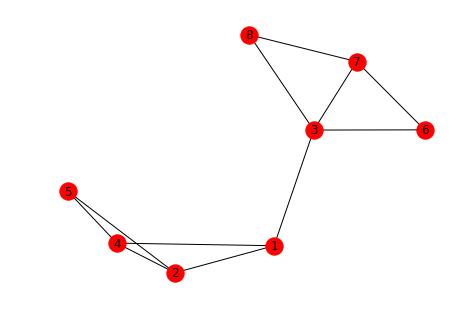

In [11]:
mygraph = nx.Graph()
mygraph.add_edge(1,2)
mygraph.add_edge(1,3)
mygraph.add_edge(1,4)
mygraph.add_edge(2,4)
mygraph.add_edge(2,5)
mygraph.add_edge(3,6)
mygraph.add_edge(3,7)
mygraph.add_edge(3,8)
mygraph.add_edge(4,5)
mygraph.add_edge(6,7)
mygraph.add_edge(7,8)

plt.clf()
nx.draw_spring(mygraph,with_labels=True)
plt.show()

The graph above is actually totally same with the example.<br>
Then we use the methods to calcuate 4 attribuates again.<br>
Of course, it is totally same as the result we got in previous approach.

In [12]:
print("Summary:")
print("D1:",mygraph.degree(1))
print("D2:",mygraph.degree(2))
print("E1:{:.2f}".format(nx.eigenvector_centrality(mygraph)[1]))
print("E2:{:.2f}".format(nx.eigenvector_centrality(mygraph)[2]))
print("C1:{:.2f}".format(nx.closeness_centrality(mygraph)[1]))
print("C2:{:.2f}".format(nx.closeness_centrality(mygraph)[2]))
print("B1:{:.2f}".format(nx.betweenness_centrality(mygraph, normalized=False)[1]))
print("B2:{:.2f}".format(nx.betweenness_centrality(mygraph, normalized=False)[2]))
print("B(1,3)",nx.edge_betweenness_centrality(mygraph, normalized=False)[1,3])
print("B(1,2)",nx.edge_betweenness_centrality(mygraph, normalized=False)[1,2])

Summary:
D1: 3
D2: 3
E1:0.41
E2:0.35
C1:0.64
C2:0.50
B1:12.00
B2:2.50
B(1,3) 16.0
B(1,2) 7.5


## Infection Models
![](src/6.png)

### SI model
![](src/7.png)
![](src/8.png)
![](src/9.png)

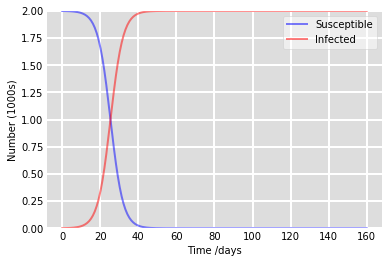

In [13]:
def SI(N = 2000, I0 = 1, beta = 0.3):
    S0 = N - I0 
    t = np.linspace(0, 160, 160)
    def deriv(y, t, N, beta):
        S, I = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N 
        return dSdt, dIdt, 
    y0 = S0, I0
    ret = odeint(deriv, y0, t, args=(N, beta))
    S, I = ret.T
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N/1000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
SI()

### SIS model
![](src/10.png)
![](src/11.png)

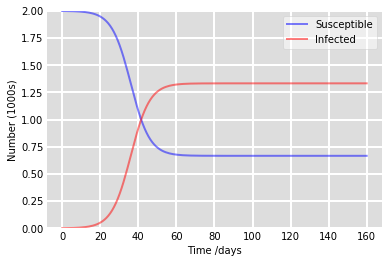

In [14]:
def SIS(N = 2000, I0 = 1, beta = 0.3, gamma = 0.1):
    S0 = N - I0
    t = np.linspace(0, 160, 160)
    def deriv(y, t, N, beta, gamma):
        S, I = y
        dSdt = -beta * S * I / N 
        dIdt = beta * S * I / N - gamma * I
        dSdt = dSdt + gamma * I
        return dSdt, dIdt
    y0 = S0, I0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I = ret.T
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N/1000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
SIS()

### SIR model
![](src/12.png)

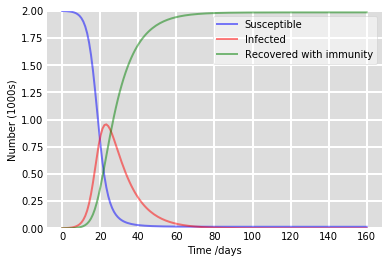

In [15]:
def SIR(N = 2000, I0 = 1, R0 = 0, beta = 0.5, gamma = 0.1):
    S0 = N - I0 - R0
    t = np.linspace(0, 160, 160)
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N/1000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
SIR()

## Extended Part:
### Random Walk

The evolution of x(t), over time slots indexed by t, can be expressed as follows:
![](src/14.png)
(v is a given set of numbers, one per node)<br>
The solution to it can be expressed through the eigenvector decomposition:
![](src/15.jpg)
![](src/16.jpg)
![](src/17.jpg)
which means that the leading term of the error between x(t) and the first-order
approximation $c_1\lambda_1^tv_1$is the second-order term in the eigenvector expansion,
with a magnitude that evolves over time t proportional to:$(\cfrac{\lambda_2}{\lambda_1})^t$<br>
As a small example, consider the network shown in Figure.consisting of
two clusters with a link between them. Each node also has a self-loop.<br>
![](src/13.jpg)

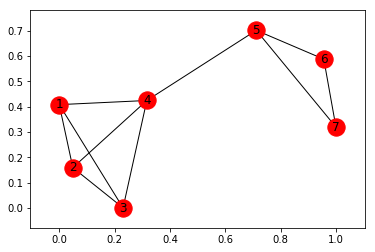

Markov matrix A for graph:
[[ 0.25  0.25  0.25  0.25  0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25  0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25  0.    0.    0.  ]
 [ 0.2   0.2   0.2   0.2   0.2   0.    0.  ]
 [ 0.    0.    0.    0.25  0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.33  0.33  0.33]
 [ 0.    0.    0.    0.    0.33  0.33  0.33]]


In [16]:
H = nx.Graph([(1,1),(1,2),(1,3),(1,4),(2,2),(2,3),(2,4),(3,3),(3,4),(4,4),(4,5),(5,5),(5,6),(5,7),(6,6),(6,7),(7,7)])
plt.clf()
nx.draw_networkx(H)
plt.show()
A = nx.attr_matrix(H,normalized=True)[0]
print("Markov matrix A for graph:")
print(np.around(A,2))

Then we iterate the equation:$$x(t)=Ax(t-1)$$


In [17]:
X = np.matrix([100, 100, 100, 100, 0, 0, 0]).T
for i in range(100000):
    if i in [0,1,2,3]:
        print("X({}):".format(i),np.around(np.array(X).T,2))
    X = A * X
print('...')
print("X(∞):",np.around(np.array(X,dtype = np.float64).T,2))

X(0): [[100 100 100 100   0   0   0]]
X(1): [[ 100.  100.  100.   80.   25.    0.    0.]]
X(2): [[ 95.    95.    95.    81.    26.25   8.33   8.33]]
X(3): [[ 91.5   91.5   91.5   78.45  30.98  14.31  14.31]]
...
X(∞): [[ 62.96  62.96  62.96  62.96  62.96  62.96  62.96]]


We see that the network is strongly connected, i.e., A is irreducible. The existence
of self-loops ensures the network is also aperiodic. The scores at equilibrium are biased towards the initial scores of the left cluster because it is the larger
cluster.

### Measuring subgraph connectedness

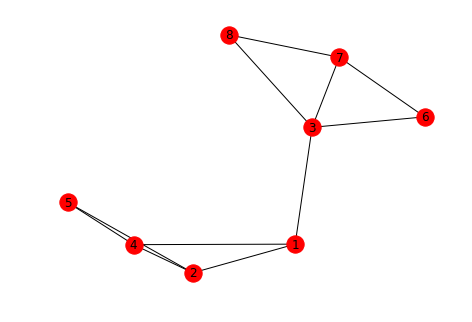

In [18]:
plt.clf()
nx.draw_spring(mygraph,with_labels = True)
plt.show()

In [19]:
print(mygraph.degree())
L = mygraph.number_of_edges()*2
print('L =',L)

{1: 3, 2: 3, 3: 4, 4: 3, 5: 2, 6: 2, 7: 3, 8: 2}
L = 22


![](src/20.jpg)

In [20]:
def modularity(nodelist1, nodelist2):
    print('type1:',nodelist1)
    print('type2:',nodelist2)
    tmp = []
    for i in range(1,9):
        tmp2 = []
        for j in range(1,9):
            if i == j:
                tmp2.append(0)
                continue
            if (i in nodelist1 and j in nodelist1) or (i in nodelist2 and j in nodelist2):
                tmp2.append(1)
            else:
                tmp2.append(0)
        tmp.append(tmp2)
    S = np.matrix(tmp)
    print('S:')
    print(np.matrix(S))
    A = nx.adjacency_matrix(mygraph).todense()
    print('A:')
    print(A)

    Q = 0
    for i in range(1,9):
        di = mygraph.degree(i)
        for j in range(1,9):        
            dj = mygraph.degree(j)
            Q = Q + S[i-1,j-1]*(A[i-1,j-1]-di*dj/L)
    Q = Q/L
    print('Q =',Q)

![](src/21.jpg)

In [21]:
modularity([1,2,4,5],[3,6,7,8])

type1: [1, 2, 4, 5]
type2: [3, 6, 7, 8]
S:
[[0 1 0 1 1 0 0 0]
 [1 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 1]
 [0 0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1 0]]
A:
[[0 1 1 1 0 0 0 0]
 [1 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 0]]
Q = 0.54132231405


![](src/22.jpg)

In [22]:
modularity([1,5,6,8],[2,3,4,7])

type1: [1, 5, 6, 8]
type2: [2, 3, 4, 7]
S:
[[0 0 0 0 1 1 0 1]
 [0 0 1 1 0 0 1 0]
 [0 1 0 1 0 0 1 0]
 [0 1 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 1]
 [1 0 0 0 1 0 0 1]
 [0 1 1 1 0 0 0 0]
 [1 0 0 0 1 1 0 0]]
A:
[[0 1 1 1 0 0 0 0]
 [1 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 0]]
Q = -0.202479338843


### Hubs and Authorities
![](src/23.jpg)

In [23]:
HA = nx.DiGraph()
HA.add_nodes_from(['A','B','C','D','E','F','G','H'],auth = 1, hub =1)
HA.add_edges_from([('A','D'),('B','C'),('B','E'),('C','A'),('D','B'),
                 ('D','C'),('E','B'),('E','C'),('E','F'),('E','D'),
                 ('F','C'),('F','H'),('G','C'),('G','A'),('H','A')])
Root = ['A','B','C']
Base = HA.nodes()
HA.nodes(data=True)

[('A', {'auth': 1, 'hub': 1}),
 ('B', {'auth': 1, 'hub': 1}),
 ('C', {'auth': 1, 'hub': 1}),
 ('D', {'auth': 1, 'hub': 1}),
 ('E', {'auth': 1, 'hub': 1}),
 ('F', {'auth': 1, 'hub': 1}),
 ('G', {'auth': 1, 'hub': 1}),
 ('H', {'auth': 1, 'hub': 1})]

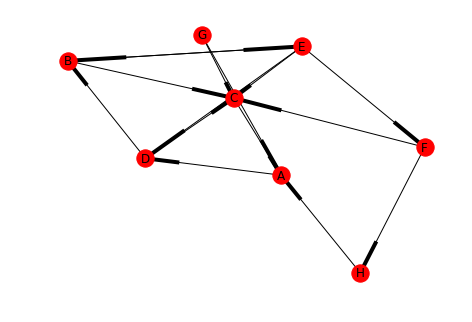

In [24]:
plt.clf()
nx.draw_spring(HA,with_labels = True)
plt.show()

iterator 1 times:
A: auth =0.20 hub =0.07
B: auth =0.13 hub =0.13
C: auth =0.33 hub =0.07
D: auth =0.13 hub =0.13
E: auth =0.07 hub =0.27
F: auth =0.07 hub =0.13
G: auth =0.00 hub =0.13
H: auth =0.07 hub =0.07
iterator 2 times:
A: auth =0.11 hub =0.04
B: auth =0.17 hub =0.13
C: auth =0.34 hub =0.07
D: auth =0.14 hub =0.16
E: auth =0.06 hub =0.22
F: auth =0.11 hub =0.13
G: auth =0.00 hub =0.18
H: auth =0.06 hub =0.07
iterator 3 times:
A: auth =0.14 hub =0.05
B: auth =0.17 hub =0.14
C: auth =0.36 hub =0.04
D: auth =0.12 hub =0.18
E: auth =0.06 hub =0.26
F: auth =0.10 hub =0.14
G: auth =0.00 hub =0.16
H: auth =0.06 hub =0.04
iterator 4 times:
A: auth =0.10 hub =0.04
B: auth =0.18 hub =0.14
C: auth =0.36 hub =0.05
D: auth =0.13 hub =0.18
E: auth =0.06 hub =0.25
F: auth =0.11 hub =0.14
G: auth =0.00 hub =0.17
H: auth =0.06 hub =0.05
......
iterator ∞ times:
A: auth =0.09 hub =0.04
B: auth =0.19 hub =0.14
C: auth =0.37 hub =0.03
D: auth =0.13 hub =0.19
E: auth =0.06 hub =0.27
F: auth =0.11 h

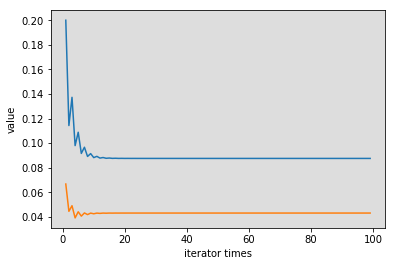

In [25]:
draw = [[],[]]
for k in range(1,100):    
    old_data = copy.deepcopy(HA.nodes(data=True))
    for _node in Base:
        HA.node[_node]['auth'] = 0
        HA.node[_node]['hub'] = 0
        nodes_point_to_it = HA.predecessors(_node)
        nodes_it_point_to = HA.successors(_node)
        for to_it in nodes_point_to_it:
            ind = Base.index(to_it)
            old_hub = old_data[ind][1]['hub']
            HA.node[_node]['auth'] = HA.node[_node]['auth']+old_hub
        for it_to in nodes_it_point_to:
            ind = Base.index(it_to)
            old_auth = old_data[ind][1]['auth']
            HA.node[_node]['hub'] = HA.node[_node]['hub']+old_auth

    auth_sum = 0
    hub_sum = 0
    for _node in Base:
        auth_sum = auth_sum + HA.node[_node]['auth']
        hub_sum = hub_sum + HA.node[_node]['hub']
    for _node in Base:
        HA.node[_node]['auth'] = HA.node[_node]['auth']/auth_sum
        HA.node[_node]['hub'] = HA.node[_node]['hub']/hub_sum
    draw[0].append(HA.node['A']['auth'])
    draw[1].append(HA.node['A']['hub'])
    if k in [1,2,3,4]:
        print('iterator {} times:'.format(k))
        for node in HA.nodes(data=True):
            print(node[0]+": ",end='')
            print('auth ={:.2f}'.format(node[1]['auth']),end=' ')
            print('hub ={:.2f}'.format(node[1]['hub']))
print('......')
print('iterator ∞ times:')
for node in HA.nodes(data=True):
    print(node[0]+": ",end='')
    print('auth ={:.2f}'.format(node[1]['auth']),end=' ')
    print('hub ={:.2f}'.format(node[1]['hub']))
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(range(1,100),draw[0],label="auth")
ax.plot(range(1,100),draw[1],label="hub")
plt.xlabel('iterator times')
plt.ylabel('value')
plt.show()

### Comparing Centrality Measures
![](src/24.png)

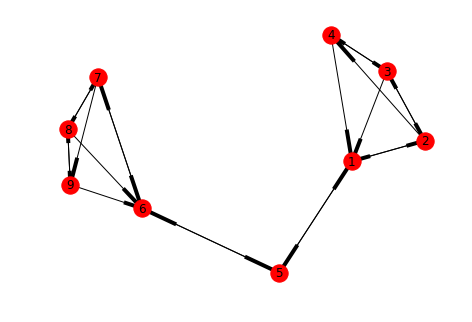

In [26]:
CC = nx.DiGraph([(1,2),(2,1),(1,5),(5,1),(2,3),
                 (3,2),(2,4),(3,4),(4,3),(3,1),
                 (4,1),(5,6),(6,5),(6,7),(7,6),
                 (7,8),(7,9),(8,7),(8,6),(8,9),
                 (9,8),(9,6)])
plt.clf()
nx.draw_spring(CC,with_labels = True)
plt.show()

In [27]:
nx.in_degree_centrality(CC)

{1: 0.5, 2: 0.25, 3: 0.25, 4: 0.25, 5: 0.25, 6: 0.5, 7: 0.25, 8: 0.25, 9: 0.25}

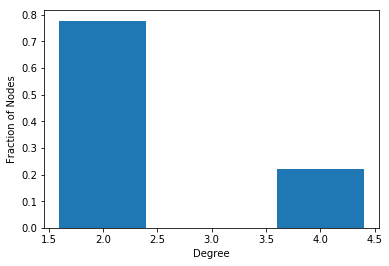

In [28]:
degrees = CC.in_degree()
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(CC)) for i in degree_values]
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

In [29]:
nx.closeness_centrality(CC)

{1: 0.42105263157894735,
 2: 0.36363636363636365,
 3: 0.36363636363636365,
 4: 0.34782608695652173,
 5: 0.4444444444444444,
 6: 0.42105263157894735,
 7: 0.36363636363636365,
 8: 0.36363636363636365,
 9: 0.34782608695652173}

In [30]:
nx.betweenness_centrality(CC)

{1: 0.5446428571428571,
 2: 0.21428571428571427,
 3: 0.008928571428571428,
 4: 0.0,
 5: 0.5714285714285714,
 6: 0.5446428571428571,
 7: 0.21428571428571427,
 8: 0.008928571428571428,
 9: 0.0}

In [31]:
nx.hits(CC)

({1: 0.03159167433704516,
  2: 0.1484870508510458,
  3: 0.13613104446713567,
  4: 0.1095467049192504,
  5: 0.1484870508510458,
  6: 0.03159167433704516,
  7: 0.1484870508510458,
  8: 0.13613104446713564,
  9: 0.1095467049192504},
 {1: 0.21121135254127466,
  2: 0.06528116009772789,
  3: 0.10043208814696536,
  4: 0.1107792643943093,
  5: 0.02459226963944558,
  6: 0.21121135254127466,
  7: 0.06528116009772789,
  8: 0.10043208814696536,
  9: 0.1107792643943093})

Then we summarize these and make a rank table
![](src/25.png)

### Link Prediction Problem
![](src/26.png)

In [32]:
LP = nx.Graph([('A','B'),('A','D'),('A','E'),('B','C'),('B','D'),
               ('C','D'),('C','F'),('E','F'),('E','G'),('F','G'),
               ('G','H'),('G','I')])

#### Measure 1: Common Neighbors
![](src/28.png)

In [33]:
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(LP, e[0], e[1])))) for e in nx.non_edges(LP)]
common_neigh.sort(key=operator.itemgetter(2), reverse = True)
for i in common_neigh:
    print(i)

('A', 'C', 2)
('H', 'E', 1)
('H', 'I', 1)
('H', 'F', 1)
('A', 'G', 1)
('A', 'F', 1)
('E', 'B', 1)
('E', 'D', 1)
('E', 'C', 1)
('E', 'I', 1)
('C', 'G', 1)
('D', 'F', 1)
('I', 'F', 1)
('B', 'F', 1)
('H', 'A', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'B', 0)
('A', 'I', 0)
('C', 'I', 0)
('G', 'B', 0)
('G', 'D', 0)
('D', 'I', 0)
('I', 'B', 0)


#### Measure 2: Jaccard Coefficient
![](src/29.png)

In [34]:
Jaccard = list(nx.jaccard_coefficient(LP))
Jaccard.sort(key=operator.itemgetter(2), reverse = True)
for i in Jaccard:
    print(i)

('H', 'I', 1.0)
('A', 'C', 0.5)
('H', 'E', 0.3333333333333333)
('H', 'F', 0.3333333333333333)
('E', 'I', 0.3333333333333333)
('I', 'F', 0.3333333333333333)
('A', 'F', 0.2)
('E', 'B', 0.2)
('E', 'D', 0.2)
('E', 'C', 0.2)
('D', 'F', 0.2)
('B', 'F', 0.2)
('A', 'G', 0.16666666666666666)
('C', 'G', 0.16666666666666666)
('H', 'A', 0.0)
('H', 'C', 0.0)
('H', 'D', 0.0)
('H', 'B', 0.0)
('A', 'I', 0.0)
('C', 'I', 0.0)
('G', 'B', 0.0)
('G', 'D', 0.0)
('D', 'I', 0.0)
('I', 'B', 0.0)


#### Measure 3: Resource Allocation
![](src/30.png)

In [35]:
RA = list(nx.resource_allocation_index(LP))
RA.sort(key=operator.itemgetter(2), reverse = True)
for i in RA:
    print(i)

('A', 'C', 0.6666666666666666)
('A', 'G', 0.3333333333333333)
('A', 'F', 0.3333333333333333)
('E', 'B', 0.3333333333333333)
('E', 'D', 0.3333333333333333)
('E', 'C', 0.3333333333333333)
('C', 'G', 0.3333333333333333)
('D', 'F', 0.3333333333333333)
('B', 'F', 0.3333333333333333)
('H', 'E', 0.25)
('H', 'I', 0.25)
('H', 'F', 0.25)
('E', 'I', 0.25)
('I', 'F', 0.25)
('H', 'A', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'B', 0)
('A', 'I', 0)
('C', 'I', 0)
('G', 'B', 0)
('G', 'D', 0)
('D', 'I', 0)
('I', 'B', 0)


#### Measure 4: Adamic-Adar Index
![](src/31.png)

In [36]:
adamic = list(nx.adamic_adar_index(LP))
adamic.sort(key=operator.itemgetter(2), reverse = True)
for i in adamic:
    print(i)

('A', 'C', 1.8204784532536746)
('A', 'G', 0.9102392266268373)
('A', 'F', 0.9102392266268373)
('E', 'B', 0.9102392266268373)
('E', 'D', 0.9102392266268373)
('E', 'C', 0.9102392266268373)
('C', 'G', 0.9102392266268373)
('D', 'F', 0.9102392266268373)
('B', 'F', 0.9102392266268373)
('H', 'E', 0.7213475204444817)
('H', 'I', 0.7213475204444817)
('H', 'F', 0.7213475204444817)
('E', 'I', 0.7213475204444817)
('I', 'F', 0.7213475204444817)
('H', 'A', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'B', 0)
('A', 'I', 0)
('C', 'I', 0)
('G', 'B', 0)
('G', 'D', 0)
('D', 'I', 0)
('I', 'B', 0)


#### Measure 5: Pref. Attachment
![](src/32.png)

In [37]:
Attachment = list(nx.preferential_attachment(LP))
Attachment.sort(key=operator.itemgetter(2), reverse = True)
for i in Attachment:
    print(i)

('A', 'G', 12)
('C', 'G', 12)
('G', 'B', 12)
('G', 'D', 12)
('A', 'F', 9)
('A', 'C', 9)
('E', 'B', 9)
('E', 'D', 9)
('E', 'C', 9)
('D', 'F', 9)
('B', 'F', 9)
('H', 'A', 3)
('H', 'E', 3)
('H', 'C', 3)
('H', 'D', 3)
('H', 'B', 3)
('H', 'F', 3)
('A', 'I', 3)
('E', 'I', 3)
('C', 'I', 3)
('D', 'I', 3)
('I', 'B', 3)
('I', 'F', 3)
('H', 'I', 1)


#### community structure
![](src/27.png)

In [38]:
LP.node['A']['community'] = 0
LP.node['B']['community'] = 0
LP.node['C']['community'] = 0
LP.node['D']['community'] = 0
LP.node['E']['community'] = 1
LP.node['F']['community'] = 1
LP.node['G']['community'] = 1
LP.node['H']['community'] = 1
LP.node['I']['community'] = 1

#### Measure 6: Community Common Neighbors
![](src/33.png)

In [39]:
CCN = list(nx.cn_soundarajan_hopcroft(LP))
CCN.sort(key=operator.itemgetter(2), reverse = True)
for i in CCN:
    print(i)

('A', 'C', 4)
('H', 'E', 2)
('H', 'I', 2)
('H', 'F', 2)
('E', 'I', 2)
('I', 'F', 2)
('A', 'G', 1)
('A', 'F', 1)
('E', 'B', 1)
('E', 'D', 1)
('E', 'C', 1)
('C', 'G', 1)
('D', 'F', 1)
('B', 'F', 1)
('H', 'A', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'B', 0)
('A', 'I', 0)
('C', 'I', 0)
('G', 'B', 0)
('G', 'D', 0)
('D', 'I', 0)
('I', 'B', 0)


#### Measure 7: Community Resource Allocation
![](src/34.png)

In [40]:
CRA = list(nx.ra_index_soundarajan_hopcroft(LP))
CRA.sort(key=operator.itemgetter(2), reverse = True)
for i in CRA:
    print(i)

('A', 'C', 0.6666666666666666)
('H', 'E', 0.25)
('H', 'I', 0.25)
('H', 'F', 0.25)
('E', 'I', 0.25)
('I', 'F', 0.25)
('H', 'A', 0)
('H', 'C', 0)
('H', 'D', 0)
('H', 'B', 0)
('A', 'G', 0)
('A', 'F', 0)
('A', 'I', 0)
('E', 'B', 0)
('E', 'D', 0)
('E', 'C', 0)
('C', 'G', 0)
('C', 'I', 0)
('G', 'B', 0)
('G', 'D', 0)
('D', 'F', 0)
('D', 'I', 0)
('I', 'B', 0)
('B', 'F', 0)


# END